In [1]:
import pandas as pd

In [3]:
df= pd.read_excel("/content/SkethersData_DS5.xlsx")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,22.420000,23.650000,22.209999,23.190001,23.190001,1946900
1,2019-01-03,23.170000,23.170000,22.230000,22.490000,22.490000,2522400
2,2019-01-04,22.879999,23.480000,22.870001,23.090000,23.090000,2225100
3,2019-01-07,23.090000,24.510000,23.090000,24.250000,24.250000,2134800
4,2019-01-08,24.650000,25.160000,24.350000,24.690001,24.690001,2139600
...,...,...,...,...,...,...,...
1069,2023-03-31,46.709999,47.700001,46.709999,47.520000,47.520000,1604800
1070,2023-04-03,47.259998,47.570000,46.880001,47.500000,47.500000,1113000
1071,2023-04-04,47.419998,47.509998,46.430000,46.830002,46.830002,1908800
1072,2023-04-05,46.180000,46.439999,45.990002,46.310001,46.310001,1265000


In [6]:
df = df[['Date', 'Close']]
display(df.head())

,Date,Close
0,2019-01-02,23.190001
1,2019-01-03,22.490000
2,2019-01-04,23.090000
3,2019-01-07,24.250000
4,2019-01-08,24.690001


In [7]:
df.describe()

,Date,Close
count,1074,1074.000000
mean,2021-02-17 05:53:57.988826880,37.859199
min,2019-01-02 00:00:00,20.610001
25%,2020-01-27 06:00:00,32.735000
50%,2021-02-18 12:00:00,37.439999
75%,2022-03-13 06:00:00,43.184999
max,2023-04-06 00:00:00,54.540001
std,NaN,6.943229


In [8]:
print(df.shape)

(1074, 2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1074 non-null   datetime64[ns]
 1   Close   1074 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.9 KB
None
Date     0
Close    0
dtype: int64


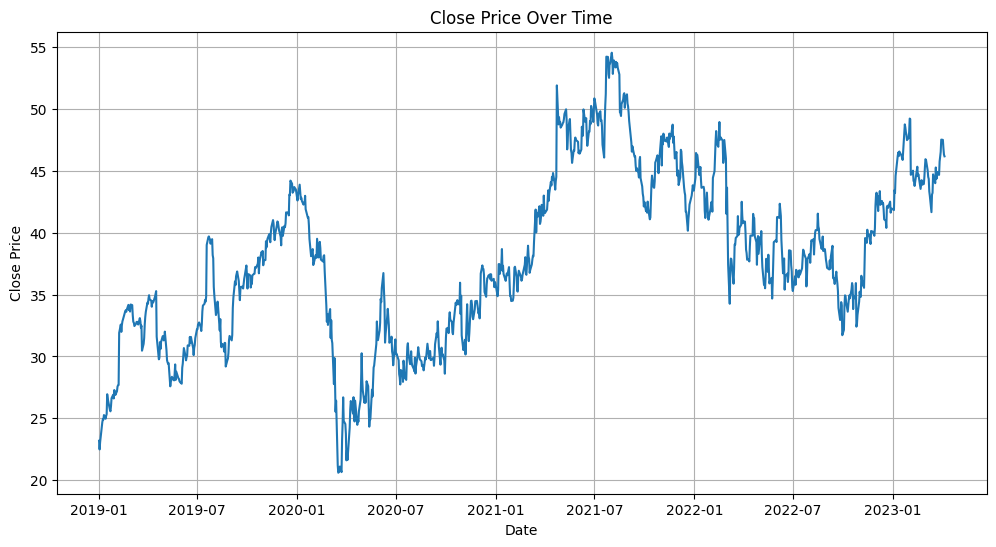

In [9]:
# Check data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Visualize the 'Close' price over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.grid(True)
plt.show()

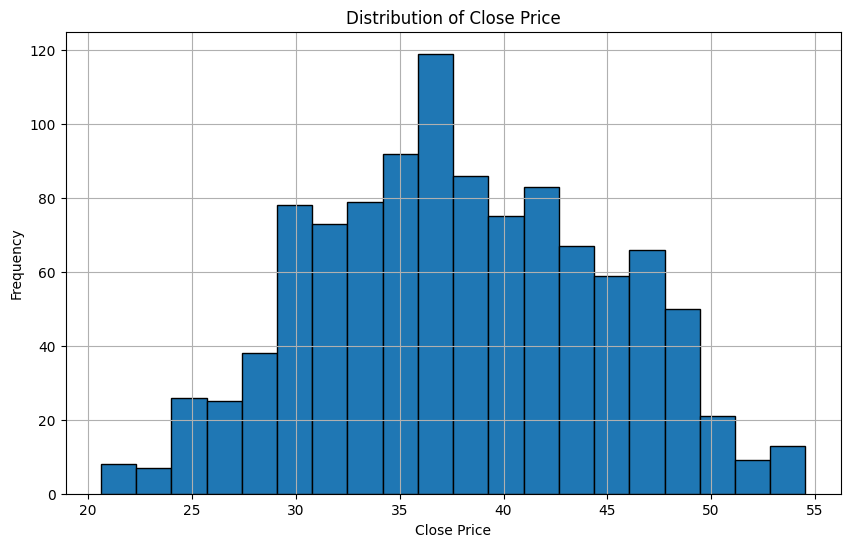

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=20, edgecolor='black')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Close Price')
plt.grid(True)
plt.show()

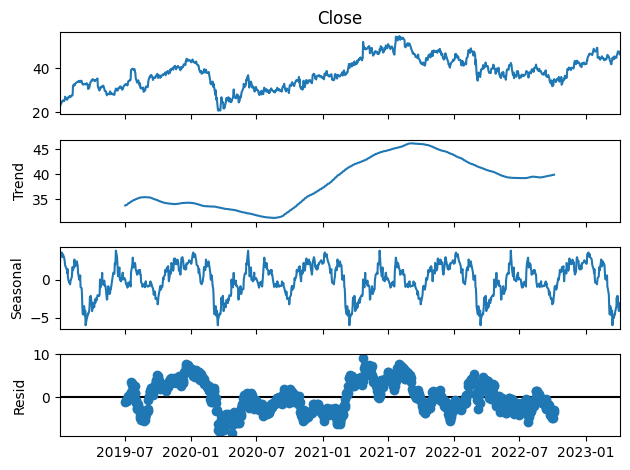

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your DataFrame 'df' has a 'Date' column as index and 'Close' as the time series data
# Set the 'Date' column as the index
df_indexed = df.set_index('Date')

# Decompose the time series
decomposition = seasonal_decompose(df_indexed['Close'], model='additive', period=252) # Assuming daily data and yearly seasonality (252 trading days)

# Plot the decomposed components
fig = decomposition.plot()
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the 'Close' price
adf_test = adfuller(df['Close'])

# Print the results
print('ADF Statistic:', adf_test[0])
print('P-value:', adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if adf_test[1] <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")

ADF Statistic: -2.7384770557119
P-value: 0.06761341709800932
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
The time series is likely non-stationary.


In [13]:
df['Close_3Month_MA'] = df['Close'].rolling(window=3*20).mean() # Assuming approximately 20 trading days in a month
display(df.head())

/tmp/ipython-input-2805046068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_3Month_MA'] = df['Close'].rolling(window=3*20).mean() # Assuming approximately 20 trading days in a month


,Date,Close,Close_3Month_MA
0,2019-01-02,23.190001,NaN
1,2019-01-03,22.490000,NaN
2,2019-01-04,23.090000,NaN
3,2019-01-07,24.250000,NaN
4,2019-01-08,24.690001,NaN


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Drop rows with NaN values in 'Close_3Month_MA' as the moving average is not defined for the initial period
df_eval = df.dropna(subset=['Close_3Month_MA'])

# Calculate error metrics
mse = mean_squared_error(df_eval['Close'], df_eval['Close_3Month_MA'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_eval['Close'], df_eval['Close_3Month_MA'])
mape = np.mean(np.abs((df_eval['Close'] - df_eval['Close_3Month_MA']) / df_eval['Close'])) * 100

# Print the error metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.4f}%')

Mean Squared Error (MSE): 14.4511
Root Mean Squared Error (RMSE): 3.8015
Mean Absolute Error (MAE): 2.9135
Mean Absolute Percentage Error (MAPE): 8.0565%


In [15]:
df['Close_5Month_MA'] = df['Close'].rolling(window=5*20).mean() # Assuming approximately 20 trading days in a month
display(df.head())

/tmp/ipython-input-2727263784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_5Month_MA'] = df['Close'].rolling(window=5*20).mean() # Assuming approximately 20 trading days in a month


,Date,Close,Close_3Month_MA,Close_5Month_MA
0,2019-01-02,23.190001,NaN,NaN
1,2019-01-03,22.490000,NaN,NaN
2,2019-01-04,23.090000,NaN,NaN
3,2019-01-07,24.250000,NaN,NaN
4,2019-01-08,24.690001,NaN,NaN


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Drop rows with NaN values in 'Close_5Month_MA'
df_eval_5m = df.dropna(subset=['Close_5Month_MA'])

# Calculate error metrics for 5-month moving average
mse_5m = mean_squared_error(df_eval_5m['Close'], df_eval_5m['Close_5Month_MA'])
rmse_5m = np.sqrt(mse_5m)
mae_5m = mean_absolute_error(df_eval_5m['Close'], df_eval_5m['Close_5Month_MA'])
mape_5m = np.mean(np.abs((df_eval_5m['Close'] - df_eval_5m['Close_5Month_MA']) / df_eval_5m['Close'])) * 100

# Print the error metrics for 5-month moving average
print(f'Mean Squared Error (MSE) for 5-month MA: {mse_5m:.4f}')
print(f'Root Mean Squared Error (RMSE) for 5-month MA: {rmse_5m:.4f}')
print(f'Mean Absolute Error (MAE) for 5-month MA: {mae_5m:.4f}')
print(f'Mean Absolute Percentage Error (MAPE) for 5-month MA: {mape_5m:.4f}%')

Mean Squared Error (MSE) for 5-month MA: 21.6777
Root Mean Squared Error (RMSE) for 5-month MA: 4.6559
Mean Absolute Error (MAE) for 5-month MA: 3.6872
Mean Absolute Percentage Error (MAPE) for 5-month MA: 10.0300%


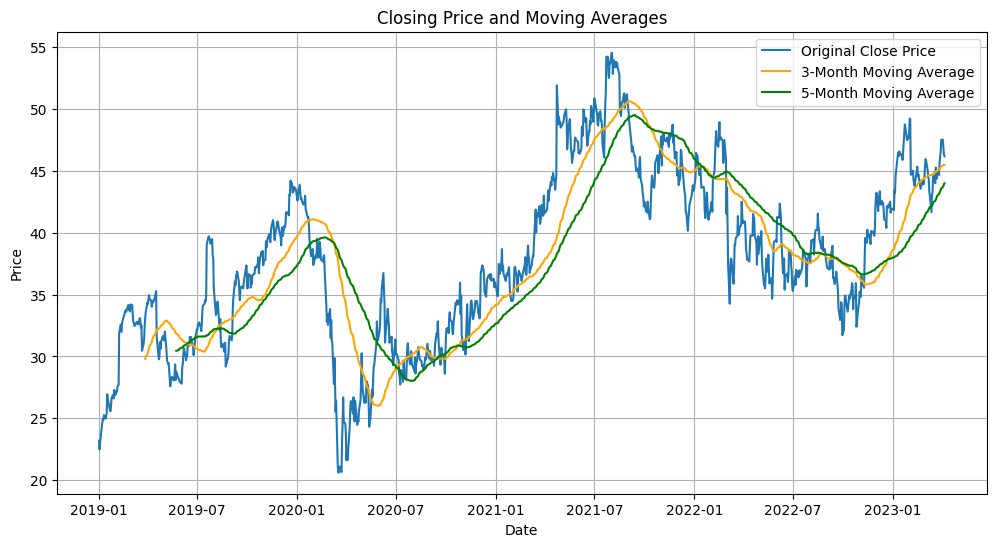

In [51]:
import matplotlib.pyplot as plt

# Plot the original data and the moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Original Close Price')
plt.plot(df['Date'], df['Close_3Month_MA'], label='3-Month Moving Average', color='orange')
plt.plot(df['Date'], df['Close_5Month_MA'], label='5-Month Moving Average', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Price and Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
import pandas as pd

# Create a dictionary with the error metrics
error_metrics = {
    'Metric': ['MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    '3-Month MA': [mse, rmse, mae, mape],
    '5-Month MA': [mse_5m, rmse_5m, mae_5m, mape_5m]
}

# Create a DataFrame from the dictionary
error_df = pd.DataFrame(error_metrics)

# Display the table
display(error_df)

,Metric,3-Month MA,5-Month MA
0,MSE,14.451071,21.677678
1,RMSE,3.801456,4.655929
2,MAE,2.913466,3.687232
3,MAPE (%),8.056503,10.029964


/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/tmp/ipython-input-175428513.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SES'] = ses_model.fittedvalues


,Date,Close,Close_3Month_MA,Close_5Month_MA,SES
0,2019-01-02,23.190001,NaN,NaN,23.190001
1,2019-01-03,22.490000,NaN,NaN,23.190001
2,2019-01-04,23.090000,NaN,NaN,23.050001
3,2019-01-07,24.250000,NaN,NaN,23.058001
4,2019-01-08,24.690001,NaN,NaN,23.296401


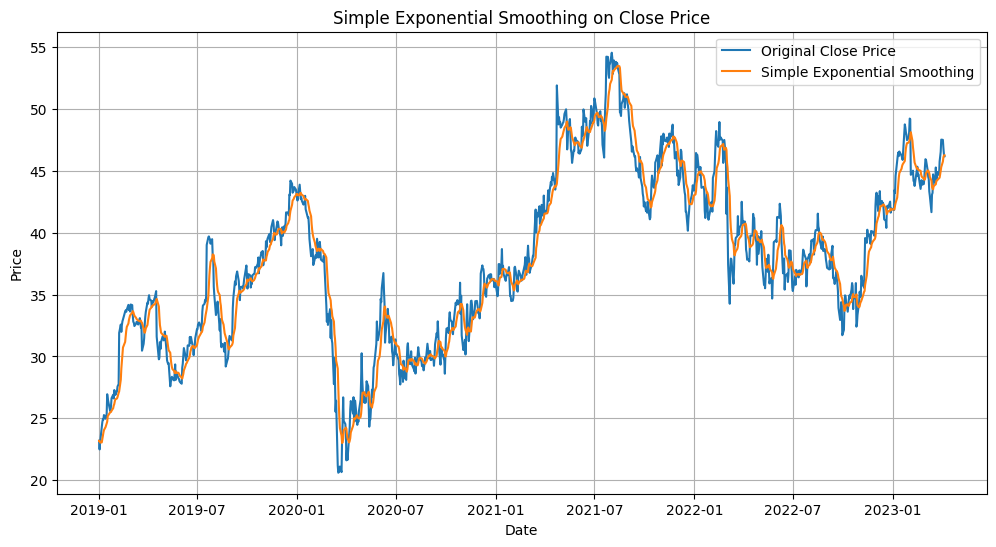

In [20]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt

# Fit the Simple Exponential Smoothing model
# You can experiment with different smoothing levels (alpha)
ses_model = SimpleExpSmoothing(df['Close']).fit(smoothing_level=0.2)

# Make predictions
df['SES'] = ses_model.fittedvalues
display(df.head())

# Plot the original data and the SES fitted values
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Original Close Price')
plt.plot(df['Date'], df['SES'], label='Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Simple Exponential Smoothing on Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Drop rows with NaN values in 'SES' (although SES typically doesn't have NaNs after fitting)
df_eval_ses = df.dropna(subset=['SES'])

# Calculate error metrics for SES
mse_ses = mean_squared_error(df_eval_ses['Close'], df_eval_ses['SES'])
rmse_ses = np.sqrt(mse_ses)
mae_ses = mean_absolute_error(df_eval_ses['Close'], df_eval_ses['SES'])
mape_ses = np.mean(np.abs((df_eval_ses['Close'] - df_eval_ses['SES']) / df_eval_ses['Close'])) * 100

# Print the error metrics for SES
print(f'Mean Squared Error (MSE) for SES: {mse_ses:.4f}')
print(f'Root Mean Squared Error (RMSE) for SES: {rmse_ses:.4f}')
print(f'Mean Absolute Error (MAE) for SES: {mae_ses:.4f}')
print(f'Mean Absolute Percentage Error (MAPE) for SES: {mape_ses:.4f}%')

Mean Squared Error (MSE) for SES: 2.5547
Root Mean Squared Error (RMSE) for SES: 1.5983
Mean Absolute Error (MAE) for SES: 1.2048
Mean Absolute Percentage Error (MAPE) for SES: 3.3314%


In [53]:
# Access and print the optimized parameters (alpha and beta) from the fitted DES model
print("Optimized Parameters for Double Exponential Smoothing Model:")
print(f"Alpha (Smoothing Level): {des_model.params['smoothing_level']:.4f}")
print(f"Beta (Smoothing Trend): {des_model.params['smoothing_trend']:.4f}")

Optimized Parameters for Double Exponential Smoothing Model:
Alpha (Smoothing Level): 0.9571
Beta (Smoothing Trend): 0.0000


/tmp/ipython-input-1036358888.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DES'] = des_model.fittedvalues


,Date,Close,Close_3Month_MA,Close_5Month_MA,SES,DES
0,2019-01-02,23.190001,NaN,NaN,23.190001,23.160179
1,2019-01-03,22.490000,NaN,NaN,23.190001,23.210172
2,2019-01-04,23.090000,NaN,NaN,23.050001,22.542328
3,2019-01-07,24.250000,NaN,NaN,23.058001,23.087967
4,2019-01-08,24.690001,NaN,NaN,23.296401,24.221625


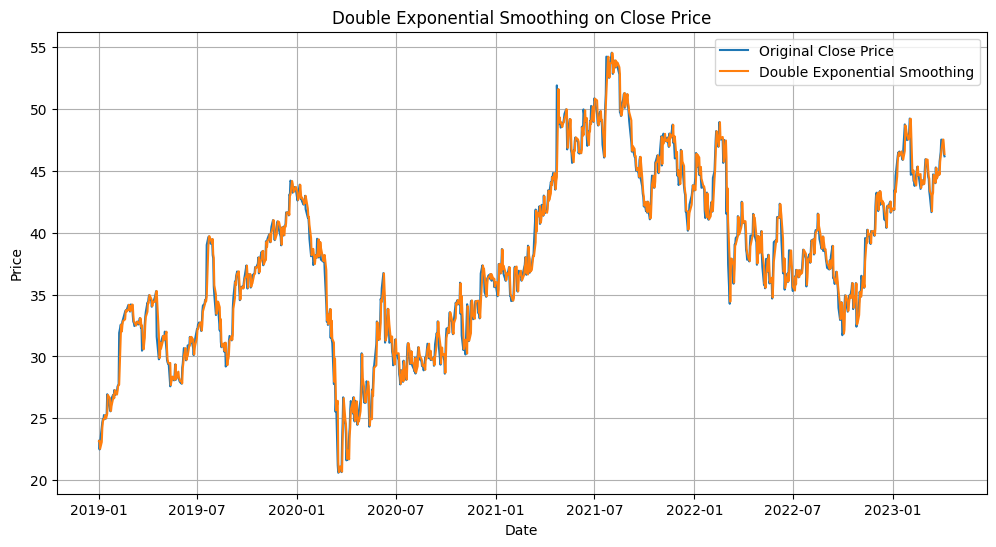

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Fit the Double Exponential Smoothing model
# You can experiment with different smoothing levels for alpha (level) and beta (trend)
des_model = ExponentialSmoothing(df['Close'], seasonal=None, trend='add').fit()

# Make predictions
df['DES'] = des_model.fittedvalues
display(df.head())

# Plot the original data and the DES fitted values
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Original Close Price')
plt.plot(df['Date'], df['DES'], label='Double Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Double Exponential Smoothing on Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# Access and print the optimized parameters (alpha, beta, gamma) from the fitted TES model
print("Optimized Parameters for Triple Exponential Smoothing Model:")
print(f"Alpha (Smoothing Level): {tes_model.params['smoothing_level']:.4f}")
print(f"Beta (Smoothing Trend): {tes_model.params['smoothing_trend']:.4f}")
print(f"Gamma (Smoothing Seasonal): {tes_model.params['smoothing_seasonal']:.4f}")

Optimized Parameters for Triple Exponential Smoothing Model:
Alpha (Smoothing Level): 0.9668
Beta (Smoothing Trend): 0.0000
Gamma (Smoothing Seasonal): 0.0000


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Drop rows with NaN values in 'DES' (although DES typically doesn't have NaNs after fitting)
df_eval_des = df.dropna(subset=['DES'])

# Calculate error metrics for DES
mse_des = mean_squared_error(df_eval_des['Close'], df_eval_des['DES'])
rmse_des = np.sqrt(mse_des)
mae_des = mean_absolute_error(df_eval_des['Close'], df_eval_des['DES'])
mape_des = np.mean(np.abs((df_eval_des['Close'] - df_eval_des['DES']) / df_eval_des['Close'])) * 100

# Print the error metrics for DES
print(f'Mean Squared Error (MSE) for DES: {mse_des:.4f}')
print(f'Root Mean Squared Error (RMSE) for DES: {rmse_des:.4f}')
print(f'Mean Absolute Error (MAE) for DES: {mae_des:.4f}')
print(f'Mean Absolute Percentage Error (MAPE) for DES: {mape_des:.4f}%')

Mean Squared Error (MSE) for DES: 1.0459
Root Mean Squared Error (RMSE) for DES: 1.0227
Mean Absolute Error (MAE) for DES: 0.7363
Mean Absolute Percentage Error (MAPE) for DES: 2.0293%


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Date,Close,Close_3Month_MA,Close_5Month_MA,SES,DES,TES
0,2019-01-02,23.190001,NaN,NaN,23.190001,23.160179,24.445534
1,2019-01-03,22.490000,NaN,NaN,23.190001,23.210172,23.629189
2,2019-01-04,23.090000,NaN,NaN,23.050001,22.542328,23.464622
3,2019-01-07,24.250000,NaN,NaN,23.058001,23.087967,23.925754
4,2019-01-08,24.690001,NaN,NaN,23.296401,24.221625,24.963872


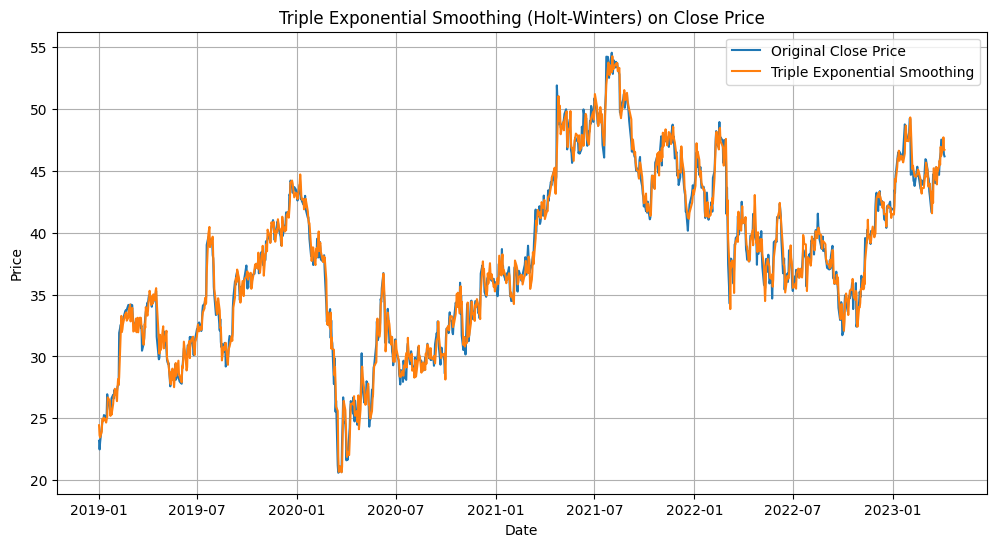

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Fit the Triple Exponential Smoothing (Holt-Winters) model
# Using additive trend and additive seasonality. You might want to experiment with multiplicative options.
# seasonal_periods is set to 252, assuming daily data and yearly seasonality
tes_model = ExponentialSmoothing(df['Close'], seasonal='add', seasonal_periods=252, trend='add').fit()

# Make predictions
df['TES'] = tes_model.fittedvalues
display(df.head())

# Plot the original data and the TES fitted values
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Original Close Price')
plt.plot(df['Date'], df['TES'], label='Triple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Triple Exponential Smoothing (Holt-Winters) on Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Drop rows with NaN values in 'TES' (although TES typically doesn't have NaNs after fitting)
df_eval_tes = df.dropna(subset=['TES'])

# Calculate error metrics for TES
mse_tes = mean_squared_error(df_eval_tes['Close'], df_eval_tes['TES'])
rmse_tes = np.sqrt(mse_tes)
mae_tes = mean_absolute_error(df_eval_tes['Close'], df_eval_tes['TES'])
mape_tes = np.mean(np.abs((df_eval_tes['Close'] - df_eval_tes['TES']) / df_eval_tes['Close'])) * 100

# Print the error metrics for TES
print(f'Mean Squared Error (MSE) for TES: {mse_tes:.4f}')
print(f'Root Mean Squared Error (RMSE) for TES: {rmse_tes:.4f}')
print(f'Mean Absolute Error (MAE) for TES: {mae_tes:.4f}')
print(f'Mean Absolute Percentage Error (MAPE) for TES: {mape_tes:.4f}%')

Mean Squared Error (MSE) for TES: 0.8152
Root Mean Squared Error (RMSE) for TES: 0.9029
Mean Absolute Error (MAE) for TES: 0.6732
Mean Absolute Percentage Error (MAPE) for TES: 1.8559%


In [25]:
import pandas as pd

# Create a dictionary with the error metrics for all models
error_metrics_all = {
    'Metric': ['MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    '3-Month MA': [mse, rmse, mae, mape],
    '5-Month MA': [mse_5m, rmse_5m, mae_5m, mape_5m],
    'SES': [mse_ses, rmse_ses, mae_ses, mape_ses],
    'DES': [mse_des, rmse_des, mae_des, mape_des],
    'TES': [mse_tes, rmse_tes, mae_tes, mape_tes]
}

# Create a DataFrame from the dictionary
error_df_all = pd.DataFrame(error_metrics_all)

# Display the table
display(error_df_all)

,Metric,3-Month MA,5-Month MA,SES,DES,TES
0,MSE,14.451071,21.677678,2.554676,1.045895,0.815218
1,RMSE,3.801456,4.655929,1.598335,1.022690,0.902894
2,MAE,2.913466,3.687232,1.204794,0.736340,0.673231
3,MAPE (%),8.056503,10.029964,3.331448,2.029264,1.855903


In [26]:
# Perform first-level differencing
df['Close_Difference'] = df['Close'].diff()

# Display the first few rows with the new differenced column
display(df.head())

# You might want to check the stationarity of the differenced series using the ADF test again
# from statsmodels.tsa.stattools import adfuller
# adf_test_diff = adfuller(df['Close_Difference'].dropna())
# print('\nADF Test on Differenced Series:')
# print('ADF Statistic:', adf_test_diff[0])
# print('P-value:', adf_test_diff[1])

,Date,Close,Close_3Month_MA,Close_5Month_MA,SES,DES,TES,Close_Difference
0,2019-01-02,23.190001,NaN,NaN,23.190001,23.160179,24.445534,NaN
1,2019-01-03,22.490000,NaN,NaN,23.190001,23.210172,23.629189,-0.700001
2,2019-01-04,23.090000,NaN,NaN,23.050001,22.542328,23.464622,0.600000
3,2019-01-07,24.250000,NaN,NaN,23.058001,23.087967,23.925754,1.160000
4,2019-01-08,24.690001,NaN,NaN,23.296401,24.221625,24.963872,0.440001


In [27]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the differenced series
# Drop the first NaN value resulting from differencing
adf_test_diff = adfuller(df['Close_Difference'].dropna())

# Print the results
print('\nADF Test on Differenced Series:')
print('ADF Statistic:', adf_test_diff[0])
print('P-value:', adf_test_diff[1])
print('Critical Values:')
for key, value in adf_test_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if adf_test_diff[1] <= 0.05:
    print("The differenced time series is likely stationary.")
else:
    print("The differenced time series is likely non-stationary.")


ADF Test on Differenced Series:
ADF Statistic: -34.11278139828564
P-value: 0.0
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
The differenced time series is likely stationary.


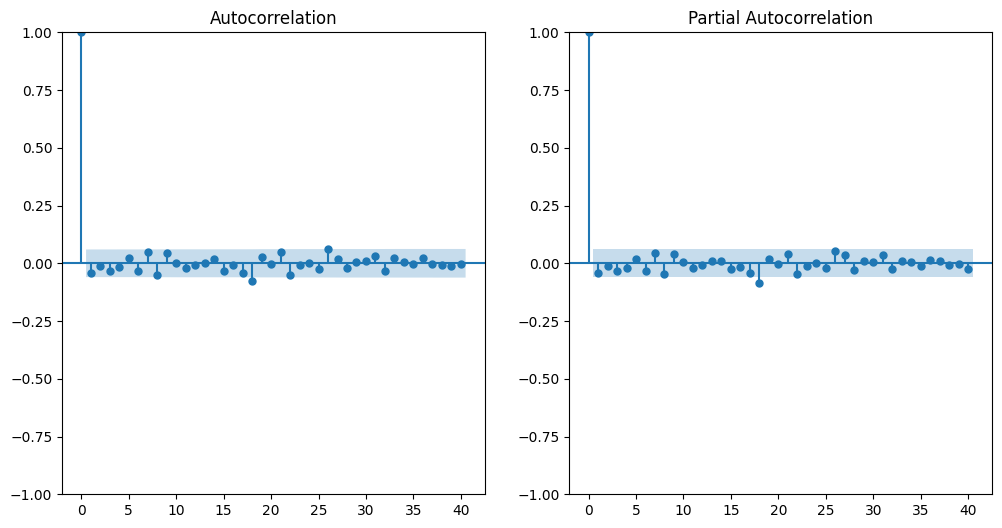

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF of the differenced series
# Drop the first NaN value before plotting
plt.figure(figsize=(12, 6))
plot_acf(df['Close_Difference'].dropna(), lags=40, ax=plt.subplot(121))
plot_pacf(df['Close_Difference'].dropna(), lags=40, ax=plt.subplot(122))
plt.show()

In [29]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA(1, 1, 0) model
# The order (p, d, q) is (1, 1, 0)
arima_model = ARIMA(df['Close'], order=(1, 1, 0))
arima_result = arima_model.fit()

# Print the model summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1074
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1547.376
Date:                Fri, 26 Sep 2025   AIC                           3098.751
Time:                        09:49:17   BIC                           3108.707
Sample:                             0   HQIC                          3102.522
                               - 1074                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0412      0.023     -1.760      0.078      -0.087       0.005
sigma2         1.0474      0.025     41.988      0.000       0.999       1.096
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA(0, 1, 1) model
# The order (p, d, q) is (0, 1, 1)
arima_model = ARIMA(df['Close'], order=(0, 1, 1))
arima_result = arima_model.fit()

# Print the model summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1074
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1547.353
Date:                Fri, 26 Sep 2025   AIC                           3098.706
Time:                        09:50:26   BIC                           3108.663
Sample:                             0   HQIC                          3102.477
                               - 1074                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0423      0.023     -1.803      0.071      -0.088       0.004
sigma2         1.0474      0.025     41.982      0.000       0.998       1.096
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [32]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA(1, 1, 1) model
# The order (p, d, q) is (1, 1, 1)
arima_model = ARIMA(df['Close'], order=(1, 1, 1))
arima_result = arima_model.fit()

# Print the model summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1074
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1546.894
Date:                Fri, 26 Sep 2025   AIC                           3099.789
Time:                        09:50:44   BIC                           3114.723
Sample:                             0   HQIC                          3105.445
                               - 1074                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5992      0.347      1.725      0.085      -0.082       1.280
ma.L1         -0.6400      0.334     -1.913      0.056      -1.296       0.016
sigma2         1.0465      0.025     41.551      0.0

In [33]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA(0, 1, 1) model
# The order (p, d, q) is (0, 1, 1)
arima_model_011 = ARIMA(df['Close'], order=(0, 1, 1))
arima_result_011 = arima_model_011.fit()

# Print the model summary
print(arima_result_011.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1074
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1547.353
Date:                Fri, 26 Sep 2025   AIC                           3098.706
Time:                        09:52:25   BIC                           3108.663
Sample:                             0   HQIC                          3102.477
                               - 1074                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0423      0.023     -1.803      0.071      -0.088       0.004
sigma2         1.0474      0.025     41.982      0.000       0.998       1.096
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [34]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA(1, 1, 1) model
# The order (p, d, q) is (1, 1, 1)
arima_model_111 = ARIMA(df['Close'], order=(1, 1, 1))
arima_result_111 = arima_model_111.fit()

# Print the model summary
print(arima_result_111.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1074
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1546.894
Date:                Fri, 26 Sep 2025   AIC                           3099.789
Time:                        09:52:27   BIC                           3114.723
Sample:                             0   HQIC                          3105.445
                               - 1074                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5992      0.347      1.725      0.085      -0.082       1.280
ma.L1         -0.6400      0.334     -1.913      0.056      -1.296       0.016
sigma2         1.0465      0.025     41.551      0.0

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Get the fitted values for each ARIMA model
arima_fitted_110 = arima_result.fittedvalues
arima_fitted_011 = arima_result_011.fittedvalues
arima_fitted_111 = arima_result_111.fittedvalues

# Calculate error metrics for ARIMA(1, 1, 0)
mse_110 = mean_squared_error(df['Close'], arima_fitted_110)
rmse_110 = np.sqrt(mse_110)
mae_110 = mean_absolute_error(df['Close'], arima_fitted_110)
mape_110 = np.mean(np.abs((df['Close'] - arima_fitted_110) / df['Close'])) * 100

# Calculate error metrics for ARIMA(0, 1, 1)
mse_011 = mean_squared_error(df['Close'], arima_fitted_011)
rmse_011 = np.sqrt(mse_011)
mae_011 = mean_absolute_error(df['Close'], arima_fitted_011)
mape_011 = np.mean(np.abs((df['Close'] - arima_fitted_011) / df['Close'])) * 100

# Calculate error metrics for ARIMA(1, 1, 1)
mse_111 = mean_squared_error(df['Close'], arima_fitted_111)
rmse_111 = np.sqrt(mse_111)
mae_111 = mean_absolute_error(df['Close'], arima_fitted_111)
mape_111 = np.mean(np.abs((df['Close'] - arima_fitted_111) / df['Close'])) * 100

# Create a dictionary with the error metrics
error_metrics_arima = {
    'Metric': ['MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'ARIMA(1, 1, 0)': [mse_110, rmse_110, mae_110, mape_110],
    'ARIMA(0, 1, 1)': [mse_011, rmse_011, mae_011, mape_011],
    'ARIMA(1, 1, 1)': [mse_111, rmse_111, mae_111, mape_111]
}

# Create a DataFrame from the dictionary
error_df_arima = pd.DataFrame(error_metrics_arima)

# Display the table
display(error_df_arima)

,Metric,"ARIMA(1, 1, 0)","ARIMA(0, 1, 1)","ARIMA(1, 1, 1)"
0,MSE,1.546224,1.547120,1.546224
1,RMSE,1.243473,1.243833,1.243473
2,MAE,0.756768,0.758731,0.756768
3,MAPE (%),2.118491,2.124114,2.118491


In [36]:
import pandas as pd

# Create a dictionary with the error metrics for all models
error_metrics_all_models = {
    'Metric': ['MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    '3-Month MA': [mse, rmse, mae, mape],
    '5-Month MA': [mse_5m, rmse_5m, mae_5m, mape_5m],
    'SES': [mse_ses, rmse_ses, mae_ses, mape_ses],
    'DES': [mse_des, rmse_des, mae_des, mape_des],
    'TES': [mse_tes, rmse_tes, mae_tes, mape_tes],
    'ARIMA(1, 1, 0)': [mse_110, rmse_110, mae_110, mape_110],
    'ARIMA(0, 1, 1)': [mse_011, rmse_011, mae_011, mape_011],
    'ARIMA(1, 1, 1)': [mse_111, rmse_111, mae_111, mape_111]
}

# Create a DataFrame from the dictionary
error_df_all_models = pd.DataFrame(error_metrics_all_models)

# Display the table
display(error_df_all_models)

,Metric,3-Month MA,5-Month MA,SES,DES,TES,"ARIMA(1, 1, 0)","ARIMA(0, 1, 1)","ARIMA(1, 1, 1)"
0,MSE,14.451071,21.677678,2.554676,1.045895,0.815218,1.546224,1.547120,1.546224
1,RMSE,3.801456,4.655929,1.598335,1.022690,0.902894,1.243473,1.243833,1.243473
2,MAE,2.913466,3.687232,1.204794,0.736340,0.673231,0.756768,0.758731,0.756768
3,MAPE (%),8.056503,10.029964,3.331448,2.029264,1.855903,2.118491,2.124114,2.118491


In [43]:
# Forecast using the fitted TES model for the next 100 days
forecast_steps = 100

# Generate the forecast
tes_forecast_100 = tes_model.forecast(steps=forecast_steps)

# Create a date index for the forecast (assuming daily data frequency)
last_date = df['Date'].iloc[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='D')[1:] # Start from the day after the last historical date

# Assign the new date index to the forecast
tes_forecast_100.index = forecast_dates

# Display the forecast
print(f'Triple Exponential Smoothing Forecast for the next {forecast_steps} steps:')
display(tes_forecast_100)

Triple Exponential Smoothing Forecast for the next 100 steps:


,0
2023-04-07,45.697997
2023-04-08,46.032064
2023-04-09,46.502131
2023-04-10,46.335856
2023-04-11,47.006668
...,...
2023-07-11,50.570148
2023-07-12,50.583303
2023-07-13,50.937225
2023-07-14,50.568115


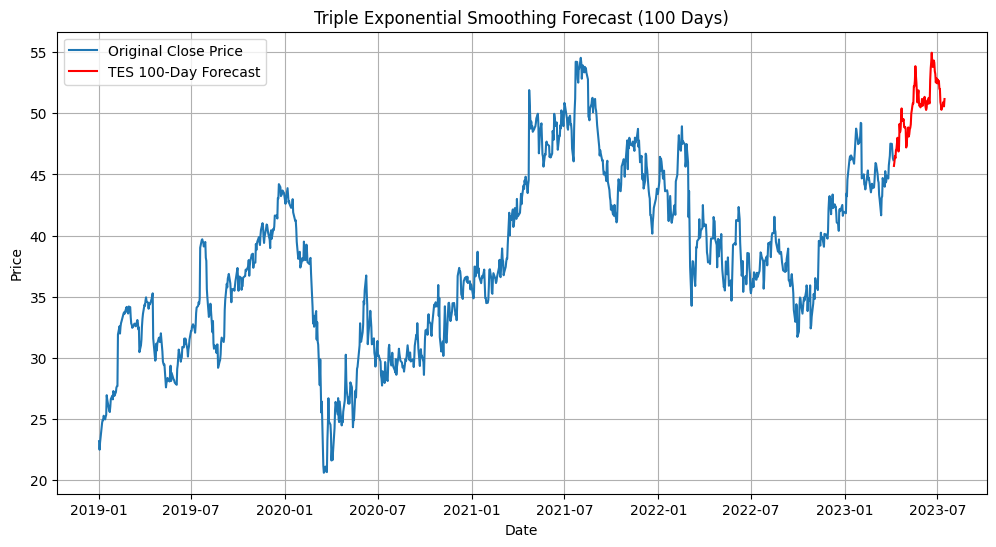

In [49]:
import matplotlib.pyplot as plt

# Plot the original data and the 100-day TES forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Original Close Price')
plt.plot(tes_forecast_100.index, tes_forecast_100, label='TES 100-Day Forecast', color='Red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Triple Exponential Smoothing Forecast (100 Days)')
plt.legend()
plt.grid(True)
plt.show()

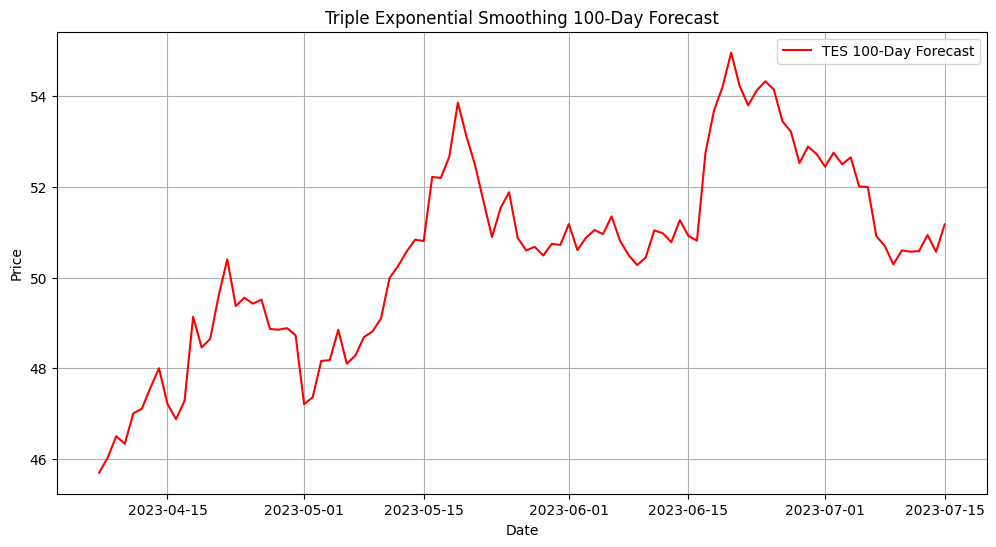

In [50]:
import matplotlib.pyplot as plt

# Plot the 100-day TES forecast
plt.figure(figsize=(12, 6))
plt.plot(tes_forecast_100.index, tes_forecast_100, label='TES 100-Day Forecast', color='Red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Triple Exponential Smoothing 100-Day Forecast')
plt.legend()
plt.grid(True)
plt.show()